# HW4 - Group 10

## 1) Hashing Task

In [1]:
import pandas as pd
import numpy as np
import math
import time
import sympy

we make a list of sorted passwords which we are gonna use later for finding the number of false positives 

In [2]:
sortpass = sorted(open("passwords1.txt").read().splitlines())

In [3]:
#with open("C:\\Users\\Nino\\ADM HW4\\passwords1.txt", 'r') as file :
    #df = pd.DataFrame(file.read().split("\n"), columns = ["pass1"])

In [4]:
#with open("C:\\Users\\Nino\\ADM HW4\\passwords2.txt", 'r') as file :
    #df["pass2"] = file.read().split("\n")

In [5]:
#len(df["pass1"])

In [6]:
#len(df["pass2"])

for implementing bloom filter, first we need to difine indipendent hash functions. Each hash function should get a string(passwords here) as number and return an integer. We decided to define 4 hash functions and build the bloom filter based on them. In the first hash function we get the ASCII code of password by multiplying the ASCII code of each character with 37 power the position of the character. Then to get indexes from these hash numbers we calculate the modular value over the size of bit array. We decided to choose the size of bit array 6 times bigger than number of elements in the password1 file, and in order to have uniformity in our bloom filter we pick the first prime number after 6*n which is 600000001 (explanation about choosing this number is in the later sections)

In [7]:
def hash_fun1 (string):
    h = [ord(i) for i in string]
    hashnumber = sum([(37**h.index(i))*i for i in h])% 600000001
    return(hashnumber)
    
    

In [8]:
hash_fun1('b*ZB/egd=!XcvV>K(qY@')

544418264

In the first hash function we get the ASCII code of each password by multiplying the ASCII code of each character with 37 power the difference of  character's position and 20. To get indexes from this number, we calculate the modular value over the size of bit array

In [9]:
def hash_fun2 (string):
    h = [ord(i) for i in string]
    hashnumber = sum([(37**(20 - h.index(i)))*i for i in h])% 600000001
    return(hashnumber)

In [10]:
hash_fun2('b*ZB/egd=!XcvV>K(qY@')

265687178

The third hash function concatenate ASCII codes of each 4 characters of the password, then calculate the sum of that value and at last return the modualar value over the size of bit array

In [11]:
def hash_fun3 (string) :
    h = [ord(i) for i in string]
    hashnumber = 0
    for i in range(0,5):
        s="".join(map(str, h[4*i : 4*i + 4]))
        try :
            hashnumber += int(s)
        except :
            pass
        hashnumber = hashnumber % 600000001
        
    return(hashnumber)    

In [12]:
hash_fun3('b*ZB/egd=!XcvV>K(qY@')

380876225

The fourth hash function concatenate ASCII codes of each 5 characters of the password, then calculate the sum of that value and at last return the modualar value over the size of bit array

In [13]:
def hash_fun4 (string) :
    h = [ord(i) for i in string]
    hashnumber = 0
    for i in range(0,4):
        s="".join(map(str, h[5*i : 5*i + 5]))
        try :
            hashnumber += int(s)
        except :
            pass
        hashnumber = hashnumber % 600000001
        
    return(hashnumber)  

In [14]:
hash_fun4('b*ZB/egd=!XcvV>K(qY@')

266238431

In [15]:
n = 100000000
m = (sympy.nextprime(6*n))
#print(m)
bfilter = np.zeros(m,int)

Now, it's time to implement our bloom filter. we take an array of size m = 600000001 with all elements equal to 0, and for each password in password1 file we update the array

In [16]:
# this function change 0 to 1 in our bit array in indexes of 4 hashnumbers we get for each password
def update_filter(array) :
    with open("passwords1.txt", 'r') as file :
            for line in file :
                array[hash_fun1(line)] = 1
                array[hash_fun2(line)] = 1
                array[hash_fun3(line)] = 1
                array[hash_fun4(line)] = 1
   

We create a Binary search function which we are gonna use for finding the number of False positives for the bonus part. 

In [17]:
# This function will return 1 if the value exist in the array and 0 if the value does not exist
def BinarySearch(array, val):
    first = 0
    last = len(array)-1
    while (first <= last) :
        mid = (first+last)//2
        if array[mid] == val:
            return(1)
        
        elif val < array[mid]:
            last = mid -1
            
        else:
            first = mid +1
    return (0)

Now, we want to implement a search filter, which for each password check whether all 4 hash numbers exist in the bit array and if it does it would increase the counter by 1. Also we decided to do the bonus part here, so for each password in password2 file we do binary search in the sorted list of password1 to see if that password exist or not. We used binary search because it's time efficient

In [18]:
def search_filter(array) :
    counter = 0
    Truepos = 0
    with open("passwords2.txt", 'r') as file :
        for line in file :
            if(array[hash_fun1(line)] == 1  and  array[hash_fun2(line)] == 1
              and array[hash_fun3(line)] == 1 and array[hash_fun4(line)] == 1) :
                counter += 1
                Truepos += BinarySearch(sortpass, line.replace("\n","")) 
                
    return(counter,Truepos)       

For deciding about the size of our bit array, I used the formula k = m * ln(2)/n for k=4 and n = 100000000. This equation gives approximate 6*n for size of our bit array. For having more uniformity in our filter, I pick the next prime numer aftr 6 * n as the size of our bit array




In [19]:
def bloom_filter(array):
    k = 4 #number of hash functions
    n = 100000000 #elemnts in bloom filter
    m = 600000001 #size of bit array
    p = pow(1 - math.exp(-k / (m / n)), k) #probability of false positive
    start = time.time()
    update_filter(array)
    duplicates = search_filter(array)[0]
    Truepositive = search_filter(array)[1]
    end = time.time()
    runtime = end - start
    print('Number of hash function used: ', k)
    print('Number of duplicates detected: ', duplicates)
    print('Probability of false positives: ', p)
    print('Number of True duplicates is : ', Truepositive)
    print('Number of false positives is : ' , duplicates - Truepositive )
    print('Execution time: ', runtime)
    
    

In [20]:
bloom_filter(bfilter)

Number of hash function used:  4
Number of duplicates detected:  15402920
Probability of false positives:  0.05605667057746283
Number of True duplicates is :  14000000
Number of false positives is :  1402920
Execution time:  6996.77089548111


## 2. Alphabetical Sort

## 3. Find similar wines!

In [16]:
import csv
import pandas as pd
from scipy.spatial import distance
import math
import random
from copy import deepcopy
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statistics import mean 

K means function. It takes as input k (number of clusters we want to find) and l (a list with the coordinates of all the points). <br>
I create two lists such that:<br>
means = [[ID numbers of means], [coordinate of means]] <br>
points = [[coordinate of points], [ID numbers of the belonging mean]] <br>
If we pass inertia = True the function will return the inertia of the points after the clustering process.

In [17]:
def kmeans(k, l, inertia = False):
    copyl = deepcopy(l)
    p1 = [[],[]] # points[0] = list of the coordinates of the points \\ points[1] = list of the ID number of the belonging cluster
    m1 = [[],[]] # means[0] = list of ID number of the means \\ means[1] = list of  coordinates of the means
    for i in l:
        p1[0].append(i)
        p1[1].append(-1)
        
    for j in range(k):
        m1[0].append(j)
        ran = random.choice(copyl)
        m1[1].append(ran)
        copyl.remove(ran)
        
    for c in range(300):    #set a max counter for how many times we iterate the process 
        m0 = deepcopy(m1)
        p0 = deepcopy(p1)
        
        #Do the assignment / update
        p1 = assignment(p0,m0,p1,m1)
        m1 = update(p0,m0,p1,m1)
        
        #Break the cycle if the updated points belong to the same centroid after the iteration
        if (p1[1] == p0[1]):
            break
    
    #Compute and return the inertia of the points in respect to the means after the clustering process if inertia = True
    if inertia == True:
        iner = 0
        for i in range(len(p1[0])):
            for k in range(len(m1[0])):
                if p1[1][i] == m1[0][k]:
                    iner += distance.euclidean(p1[0][i], m1[1][k])
        return (iner)
    #Return the list means and points as already described
    return (m1, p1)

Define two function. Assignment will assign each point to the closest mean. Update will update the means coordinates to the centroid of the cluster.

In [18]:
def assignment(p0, m0, p1, m1):
    for i in range(len(p0[0])):
        dist = math.inf
        for k in range(len(m0[0])):
            d = distance.euclidean(p0[0][i], m0[1][k])          
            if (d < dist):  #For each point calculate the distance between the point and each mean.
                dist = d
                p1[1][i] = m0[0][k]
    return(p1)

def update(p0,m0,p1,m1):
    for k in range(len(m1[0])):
        index = 0
        c = np.zeros(len(p1[0][0]))
        for i in range(len(p1[1])):
            if (int(p1[1][i]) == int(m1[0][k])):
                index += 1
                c += np.array(p1[0][i])
        m1[1][k] = list(c / index)
    return(m1)


I make a list with the coordinates of each point (wine) to pass to the function "kmeans".

In [19]:
l = []
with open(r'C:\Users\39335\Desktop\GitHub\Notes\wine.data') as file:
    reader = csv.reader(file)    
    # Make a list to pass to the kmeans funciton
    for row in reader:
        row.pop(0)
        row = list(map(float, row))  #make all the coordinates floats 
        l.append(row)

Now we run the function kmeans. It returns the lists <br> 
means = [[ID numbers of means], [coordinate of means]] <br>
points = [[coordinate of points], [ID numbers of the belonging mean]]

In [20]:
N = 4
print(kmeans(N, l)[1][1])

[0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 0, 3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 0, 3, 1, 1, 1, 3, 3, 3, 1, 1, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 0, 0, 1]


Compare the results we obtained with the result of sklearn.cluster.KMeans

In [21]:
from sklearn.cluster import KMeans
clustering = KMeans(n_clusters=N, init="random",  max_iter=500).fit(l)
clustering.predict(l)

array([1, 1, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 0, 0, 0,
       1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 0, 0, 1, 3, 3, 1, 1, 3, 3, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 1, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 0,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 1, 0, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 3, 1, 0, 0, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0,
       0, 3])

The cluster are similar, that means that the kmeans function we wrote is working. <br>
Now we want to find the right number of clusters using the elbow method.

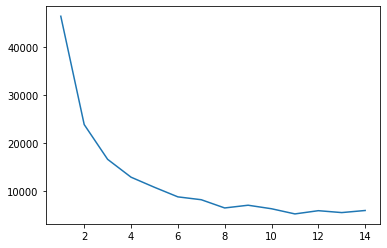

In [22]:
ine = []
k = []
for i in range(1,15):
    ine.append(kmeans(i, l, inertia=True))
    k.append(i)
plt.plot(k, ine)

It looks like the optimal number of cluster is 4. <br>
Now we want to analyse the components to understand what are the ones that are more important in the decision of the clusters. <br>
To do this we'll need to make a dataframe with the data of the wines.


In [23]:
with open(r'C:\Users\39335\Desktop\GitHub\Notes\wine.data') as file:
    reader = csv.reader(file)
    
    # Make a data frame, we'll need this for the visualization
    col = ["Cultivator", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline"]
    data = pd.DataFrame(reader, columns=col)

Add the belonging cluster to the dataframe.

In [24]:
data["Cluster"] = kmeans(N, l)[1][1]

Add the index as a column. (We will need it for the scatter plot)

In [25]:
data['Index'] = data.index
data

,Cultivator,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Cluster,Index
0,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065,3,0
1,1,13.2,1.78,2.14,11.2,100,2.65,2.76,.26,1.28,4.38,1.05,3.4,1050,3,1
2,1,13.16,2.36,2.67,18.6,101,2.8,3.24,.3,2.81,5.68,1.03,3.17,1185,0,2
3,1,14.37,1.95,2.5,16.8,113,3.85,3.49,.24,2.18,7.8,.86,3.45,1480,0,3
4,1,13.24,2.59,2.87,21,118,2.8,2.69,.39,1.82,4.32,1.04,2.93,735,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,.61,.52,1.06,7.7,.64,1.74,740,2,173
174,3,13.4,3.91,2.48,23,102,1.8,.75,.43,1.41,7.3,.7,1.56,750,2,174
175,3,13.27,4.28,2.26,20,120,1.59,.69,.43,1.35,10.2,.59,1.56,835,3,175
176,3,13.17,2.59,2.37,20,120,1.65,.68,.53,1.46,9.3,.6,1.62,840,3,176


To understand what are the important features we will plot the mean of each feature for each of the 4 clusters. <br>
We drop the "Cultivator" column because we don't need it and split the dataframe for each cluster.

In [26]:
data = data.drop(columns = "Cultivator")
data0 = data[data['Cluster'] == 0]
data1 = data[data['Cluster'] == 1]
data2 = data[data['Cluster'] == 2]
data3 = data[data['Cluster'] == 3]

We take the mean of each column.

In [27]:
feat_means = []
means = []
for i in range(1,len(col)):
    m = []
    for k in range(N):
        name = globals()["data" + str(k)][col[i]]
        lfloat = map(float,list(name))
        m.append(mean(lfloat))
    means.append(m)

Make a barplot of the mean of each feature of each cluster.

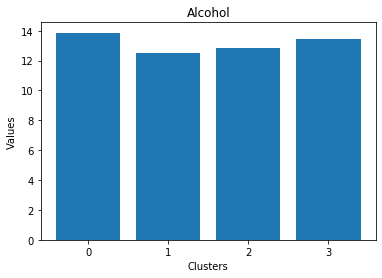

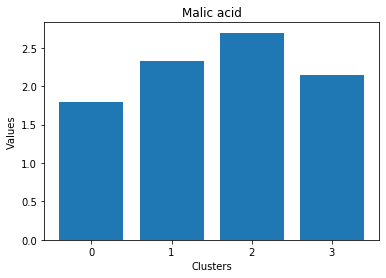

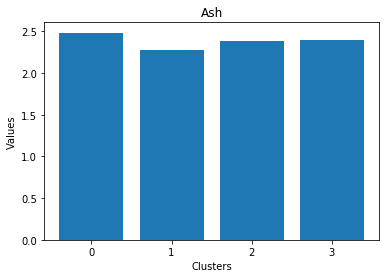

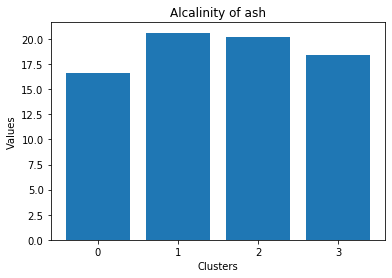

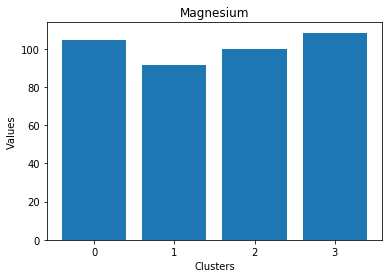

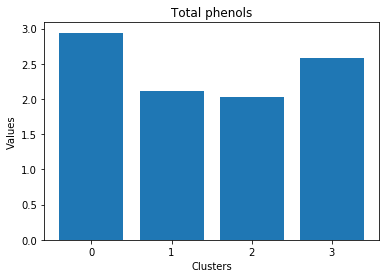

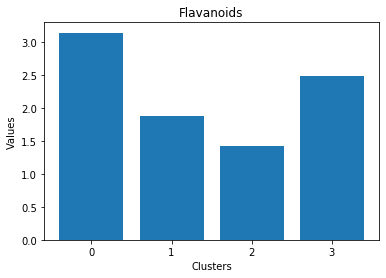

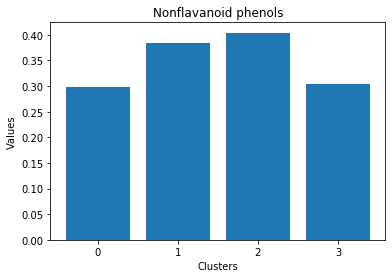

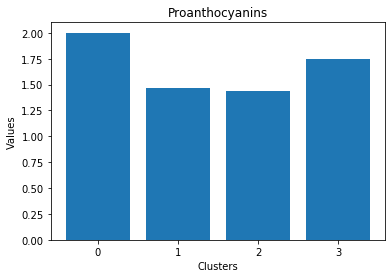

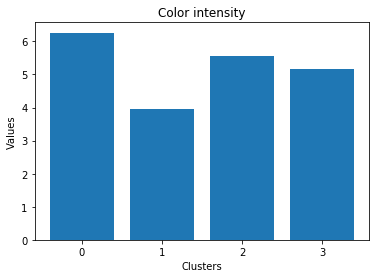

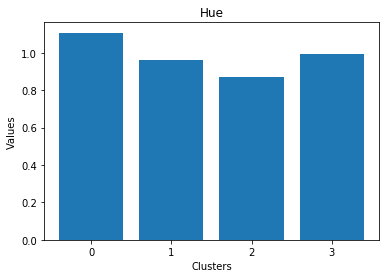

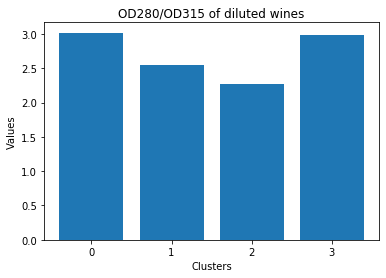

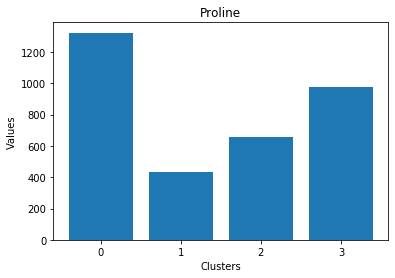

In [28]:
bars = [0,1,2,3]
index = 1
for height in means:
    plt.title(col[index])
    index += 1
    y_pos = np.arange(len(bars))
    plt.bar(y_pos, height)
    plt.xticks(y_pos, bars)
    plt.xlabel('Clusters')
    plt.ylabel('Values')
    plt.show()

We can see that the features that most characterize the clusters are the ones with an higher difference of means. In our case they are: Flavanoids, Proline, Color intensity and Proanthocyanins.<br>
Now we will make a 2D scatter plot to try and see if we can identify better the features that matter the most.

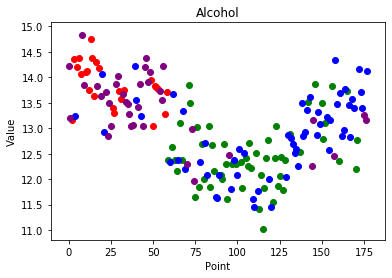

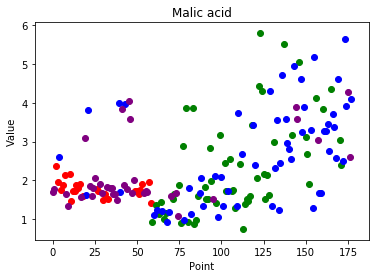

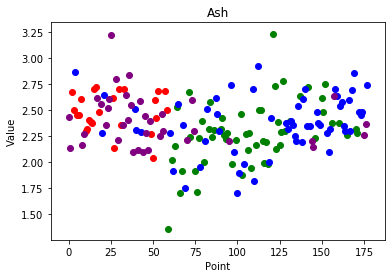

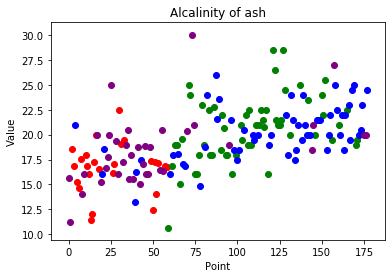

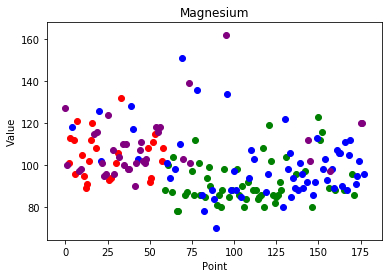

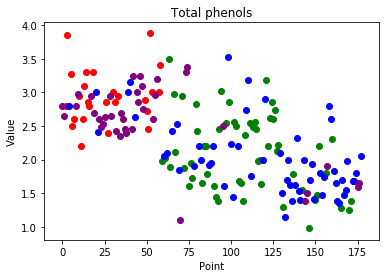

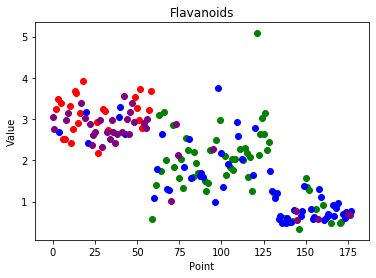

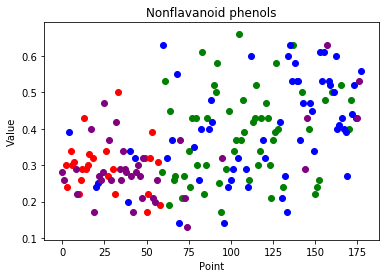

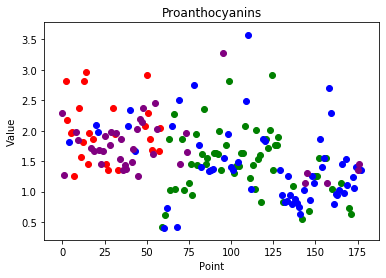

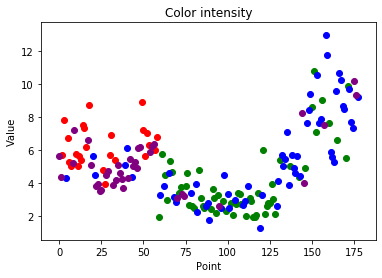

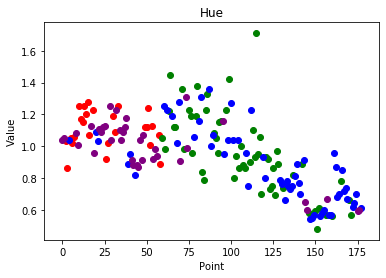

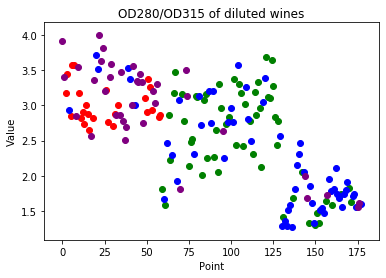

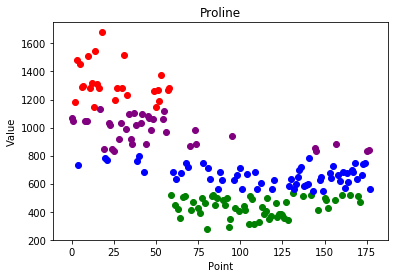

<Figure size 432x288 with 0 Axes>

In [29]:
colors = ("red", "green", "blue", "purple")
for i in col[1:]:
    for k in range(N):
        name = globals()["data" + str(k)]
        points = []
        for j in name[i]:
            points.append(float(j))
        plt.scatter(name["Index"], points , color = colors[k])
    plt.title(i)
    plt.xlabel("Point")
    plt.ylabel("Value")
    plt.show()
    plt.clf()

It looks like Proline is the clear discriminant for the clustering of the wines.

### Conclusions

It is important to note that the "Proline" numerical numbers are much bigger compared to the other features, so it is logical that the distance between the different point is given, by the most part, by the different values of the Proline. <br>
To make a better analysis it could be useful to rescale the variables to avoid that the feature with the biggest numerical numbers overshadows the importance of the other features in the clustering process. 